# Neural Network Regression on medical cost dataset

### Data set
Medical Cost dataset - https://www.kaggle.com/datasets/mirichoi0218/insurance

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [9]:
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 123)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 11), (1070,), (268, 11), (268,))

In [54]:
tf.random.set_seed(123)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[11]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics =['mae'])

history_1 = insurance_model.fit(X_train, y_train, epochs=100,verbose=0)

In [55]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3026.4470 - mae: 3026.4470


[3026.447021484375, 3026.447021484375]

In [71]:
tf.random.set_seed(123)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[11]),
    tf.keras.layers.Dense(15),
    tf.keras.layers.Dense(1)
]
)

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(0.01),
                          metrics=['mae'])

history_2 = insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

In [72]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 13586.6191 - mae: 13586.6191


[13586.619140625, 13586.619140625]

Text(0.5, 0, 'epochs')

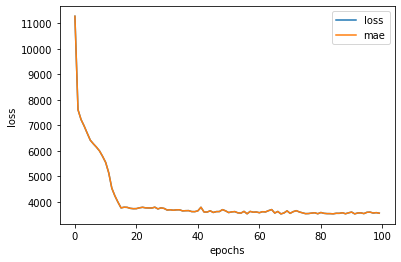

In [56]:
pd.DataFrame(history_1.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Text(0, 0.5, 'loss')

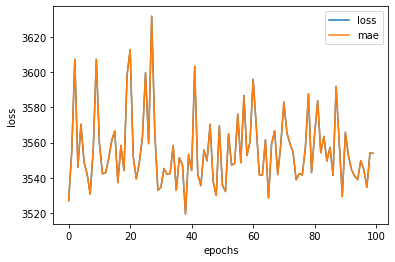

In [73]:
pd.DataFrame(history_2.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

## Normalizing and Standardizing Data

In [74]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [77]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

X = insurance.drop('charges', axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test =  train_test_split(X,
                                                   y,
                                                   test_size= 0.2,
                                                   random_state=123)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [79]:
X_train.loc[2]

age                28
sex              male
bmi              33.0
children            3
smoker             no
region      southeast
Name: 2, dtype: object

In [81]:
X_train_normal[2]

array([0.69565217, 0.28625235, 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        ])

In [82]:
X_train.shape, X_test.shape, X_train_normal.shape, X_test_normal.shape

((1070, 6), (268, 6), (1070, 11), (268, 11))

In [83]:
y_train.shape, y_test.shape

((1070,), (268,))

In [85]:
tf.random.set_seed(123)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[11]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss= tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics =['mae'])

history_3 = insurance_model_3.fit(X_train_normal, y_train, epochs= 100, verbose= 0)

In [86]:
insurance_model_3.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3012.2551 - mae: 3012.2551


[3012.255126953125, 3012.255126953125]

Text(0, 0.5, 'loss')

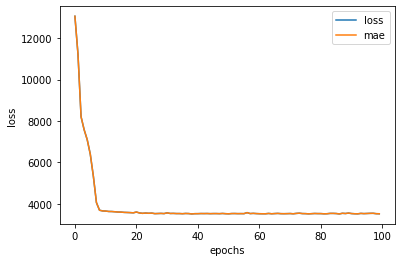

In [88]:
pd.DataFrame(history_3.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')